**UEM SEMESTER PROJECT 5TH SEMESTER : BREAST CANCER CLASSIFICATION**

Author Name : Rajarshi Banerjee

Class and Section : 3 D

Year: 3 RD Year

Organisation : University of Engineering and Management, Kolkata

Group ID : 113

Enrollment Number : 12019009022068

**SYSTEM SPECIFICATIONS AND REQUIREMENTS FOR THIS PROJECT**

We have used Anaconda to create a separate environment for this project with the following installed:

- Tensorflow 2.8.0
- Python 3.9
- Numpy
- OpenCV
- CudaToolkit 11.3
- cuDNN Libaries for CudaToolkit 11.3
- Pytorch
- Matplotlib

The system that this project was run on and the models were trained had the following specifications:

- CPU : AMD RYZEN 5 5600X
- GPU : NVIDIA GEFORCE RTX 3060TI
- RAM : 16 GB DDR4 3600 MHZ
- STORAGE : 1TB KINGSTON NVME M.2 SSD
- PSU : 750 GIGABYTE POWERSUPPLY

**BREAST CANCER CLASSIFICATION USING RBF AND A COMPARITIVE STUDY BETWEEN MODELS**

**SUB PROJECT : VGG-19 IMPLEMENTATION**

In this project we have classified Breast Cancer cells using rbf and we aim to implement different models and compare the accuracy on the data for the different models.

The models implemented in this project are :

- Custom Convolutional Neural Network
- VGG 16
- VGG 19
- SVC with RBF
- EfficientNETB0
- EfficientNETB1
- EfficientNETB2
- EfficientNETB3
- EfficientNETB4
- EfficientNETB5
- EfficientNETB6
- EfficientNETB7
- EfficientNETB8
- EfficientNETB9

We start by importing the necessary libaries.

- Image processes the data.
- We start by importing ImageDataGenerator which generates multiple versions of the image by shrinking it, zooming and flipping it horizontally or vertically.
- We then import Sequential to enable stacking of neurons.
- Flatten converts 2D image to 1D image. 
- Dense helps in create layers.
- VGG19 pre-constructed model from keras.models
- Numpy is used to convert lists into arrays.
- The glob module finds all the pathnames matching a specified pattern

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
import numpy as np
from glob import glob

We then specify the dimensions of the images and initialising the directory of the stored images. 

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset_2000/train'
valid_path = 'Dataset_2000/valid'

Input Image size is initialised and 3 is for rgb channel

Importing the VGG19 libaray as shown below and add preprocessing layer to the front of the VGG19

Here we will be using the imagenet weights

include_top means that we will be removing the first and the last layer. The first layer will have 224x224 from the weights, the last layer will be 1000 categories as the weights used are from imagenet, since in our custom dataset we have only two categories we remove the first and the last layer

In [3]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

We are using the weights from image net so no training should happen in the middle layers but only in the last layer.

In [4]:
for layer in vgg19.layers:
    layer.trainable = False

Now we find out the number of output classes 

In [5]:
folders = glob('Dataset_2000/train/*')
folders

['Dataset_2000/train\\0_NoCancer', 'Dataset_2000/train\\1_Cancer']

Now from the architecture it is evident that we need to flatten the layers and thus we use the Flatten function.

The length of folders have been used as the output layer, which means two output categories.

In [6]:
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='sigmoid')(x)

**VGG 19 NEURAL NETWORK**

The Model is then created. The VGG 19 architecture looks like the figure below : 

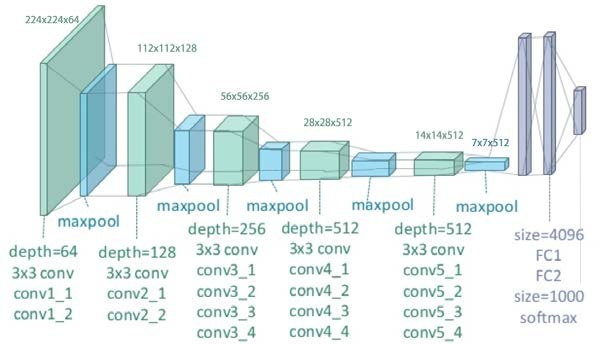

The neural network structure is as follows : 

- Convolutional Layer 
- Convolutional Layer 
- MaxPooling Layer 
- Convolutional Layer 
- Convolutional Layer 
- MaxPooling Layer 
- Convolutional Layer 
- Convolutional Layer 
- Convolutional Layer
- Convolutional Layer
- MaxPooling Layer 
- Convolutional Layer 
- Convolutional Layer 
- Convolutional Layer
- Convolutional Layer
- MaxPooling Layer
- Convolutional Layer 
- Convolutional Layer 
- Convolutional Layer
- Convolutional Layer
- MaxPooling Layer
- Flatten layer
- Fully connected + ReLU activation
- Fully connected + ReLU activation
- Fully connected + ReLU activation
- Output layer

In [7]:
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The Model is then compiled with :

- loss = categorical_crossentropy
- optimizer = adam
- metrics = accuracy

In [8]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Now we generate the training data. We have rescaled it, sheared it, zoomed it and horizontally flipped it. So out of one image we have generated 4 images for the training data. 

For the validation data, we have only rescaled it.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Now we get the images from the respective directories

In [10]:
training_set = train_datagen.flow_from_directory('Dataset_2000/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset_2000/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


Model is then trained on the training data and the accuracy is measured on both the training and the validation dataset.

In [11]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  shuffle = True
)

C:\Users\rajar\AppData\Local\Temp\ipykernel_16588\1784854242.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/35
63/63 [==============================] - 18s 225ms/step - loss: 0.6247 - accuracy: 0.7065 - val_loss: 0.5182 - val_accuracy: 0.7825
Epoch 2/35
63/63 [==============================] - 13s 210ms/step - loss: 0.4808 - accuracy: 0.7815 - val_loss: 0.4551 - val_accuracy: 0.8075
Epoch 3/35
63/63 [==============================] - 13s 208ms/step - loss: 0.4056 - accuracy: 0.8300 - val_loss: 0.4293 - val_accuracy: 0.8125
Epoch 4/35
63/63 [==============================] - 13s 208ms/step - loss: 0.4121 - accuracy: 0.8195 - val_loss: 0.5400 - val_accuracy: 0.7700
Epoch 5/35
63/63 [==============================] - 13s 210ms/step - loss: 0.4016 - accuracy: 0.8250 - val_loss: 0.4106 - val_accuracy: 0.8050
Epoch 6/35
63/63 [==============================] - 13s 210ms/step - loss: 0.3651 - accuracy: 0.8525 - val_loss: 0.4490 - val_accuracy: 0.7900
Epoch 7/35
63/63 [==============================] - 13s 209ms/step - loss: 0.3459 - accuracy: 0.8500 - val_loss: 0.3763 - val_accuracy: 0.8400

Model is then evaluated on the training and validation dataset and the respective accuracy is displayed

In [12]:
print(model.evaluate(training_set))
print(model.evaluate(test_set))

63/63 [==============================] - 12s 192ms/step - loss: 0.1838 - accuracy: 0.9320
[0.1837639957666397, 0.9319999814033508]
13/13 [==============================] - 1s 84ms/step - loss: 0.4036 - accuracy: 0.8250
[0.40357470512390137, 0.824999988079071]


Now we plot the Validation and Training loss and Validation and Training Accuracy

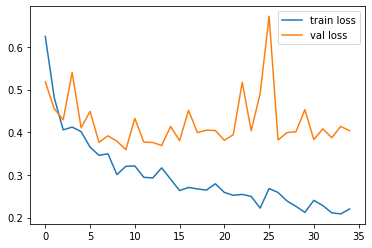

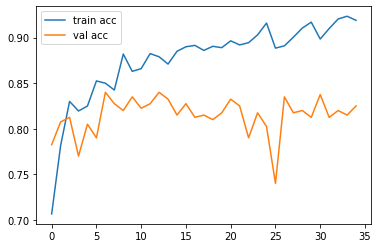

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')